# Abstract

In this project, I try to cluster NFL teams from the seasons between 2017 and 2020 based on positional spending allocation in order to see if different allocations lead to meaningful differences in tangible results. Doing so could allow better allocations to get the desired results.

The data is clustered into 6 clusters, and then statistical and win percentage data is added for analysis. The results show some relationships between spending allocation and results such as wins and stats produced, but due to the lack of data, it is hard to be too confident in the results. This project is a good beginning, but more work needs to be done.

First, I introduce the project, then I go over motivations before examining related work on the subject. After then going over methods, I describe the process of the project in through experiments and results, before drawing conclusions and pointing to areas of future improvement.


# Introduction

One of the main differences between the major US professional sports leagues is whether or not the league uses a salary cap. For example, MLB does not use a salary cap, while the NFL does. 

At the risk of over-simplifying to a small degree, the lack of a salary cap essentially means that the teams with the most money have the most money to spend. These bigger market teams are routinely able to sign expensive players and try to field exceptional players at every position. This type of system is great for the players, as the only limit to how much they can make is how much teams are willing to pay for them. 

By contrast, having a salary cap means that there is a maximum that teams can spend per season. Because of this, consideration needs to be given to where the money is being spent. If a team spends more for a running back, they have less to spend for a wide receiver, for example. Rather than fielding the best roster that a team can afford, teams need to balance skill and price across the board to stay under cap. Because of this, it might be possible to find meaningful connections between how teams choose to allocate their resources when constructing a roster. 


# Motivation

My goal with this project is to conduct an exploratory analysis of positional spending by NFL teams to better understand how cap distribution differs between teams and how those differences translate into tangible results.

It is unlikely that one “ideal” distribution of resources exists, partially because the game is complex enough that there are multiple ways to win, and partially because players making the same salary do not always provide the same results for that price. However, it is very possible that relationships exist between the amount of the cap spent on different roles and tangible results that those spending habits lead to. 

Finding and understanding these relationships could be very helpful to those running NFL franchises. For example, if there was a theoretical point where spending more money on a quarterback would not translate to any meaningful increase in performance, that money could instead be allocated to another position where perhaps spending more would increase production. Clustering seems like the best approach to take for this project, both because it is exploratory, and because seeing if clusters of similar teams produce similar results would add weight to any observations made as a result of the analysis.



# Related Work

As it turns out, positional spending data is not easy to come by. Not surprisingly, there has not been a lot of work done on this topic, at least not publicly. The few that I have found seem to focus very heavily on unit spending and less on positional spending. While understanding how spending habits on offenses, defenses, and special teams as wholes is certainly important, focusing too much on the entire units misses potentially important information contained on a position by position basis. Even if two teams spend the same amount on offense, if one spends the majority on a quarterback, while the other spends little on a quarterback and instead opts to get a good running game, the results produced by this spending could differ greatly. Thus, I really want to try to capture the effect of spending on a position by position basis, in addition to more general overall units.

# Proposed Method

To conduct this analysis, I first take positional salary data for each of the 32 NFL teams from 2017 to present. Ideally I would have more information, but it looks like this information was not tracked (at least publicly) until 2013, and data prior to 2017, while available, is not free. While this ultimately only yields 128 observations, it must suffice for now. 

With this data, I will perform clustering to find groupings of observations with similar positional spending allocations across every position. After verifying there is meaning in these groupings, I will add in data containing win percentages for each of the observations, as well as per game statistics. With these added, I will be able to see if positional spending allocations have any meaningful effect on these metrics.


# Data

For this project, I use 3 types of data:

Positional spending data from 2017-present, from https://www.spotrac.com/nfl/ which I manually entered into my own excel document and added year and team columns to each entry. The data comes in a player by player basis, which I convert to a team by team, position by position basis.

NFL per game statistical data from 2017-present, from pro football reference, which I add a year column to in my utils function for merging purposes, as well as change the team value from full team name to the accepted abbreviation. This data goes through week 9 of this season.

NFL team data from 2017-present, from pro football reference, which I really only care about the win percentage of each team. It comes in two files per year, one for each conference. I add year columns to the data, as well as change the team value to the abbreviation, and then merge into one frame keeping only the year, team, and win percentage columns. This data runs through week 12-13 (because games are played at weird times due to COVID-19, some teams had not played their week 13 games yet when the data was taken).


# Experiments

First, I load all 3 types of data. The salary data looks like this:

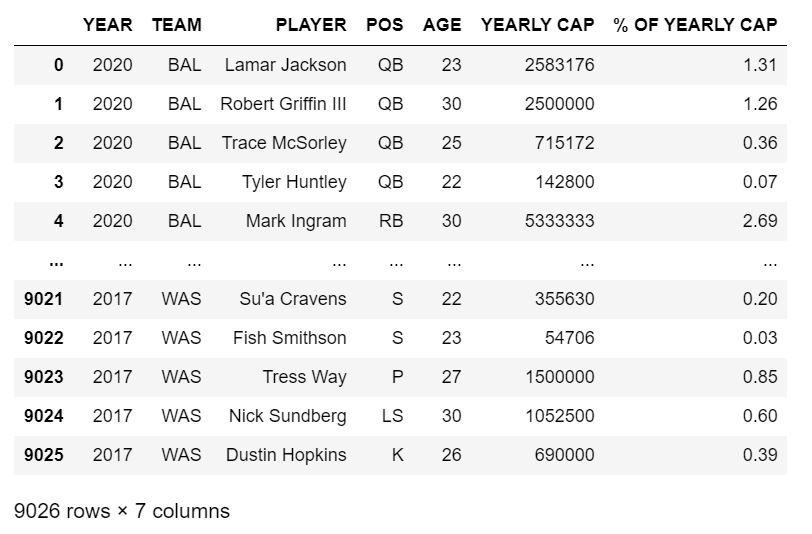

The statistical data looks like this:

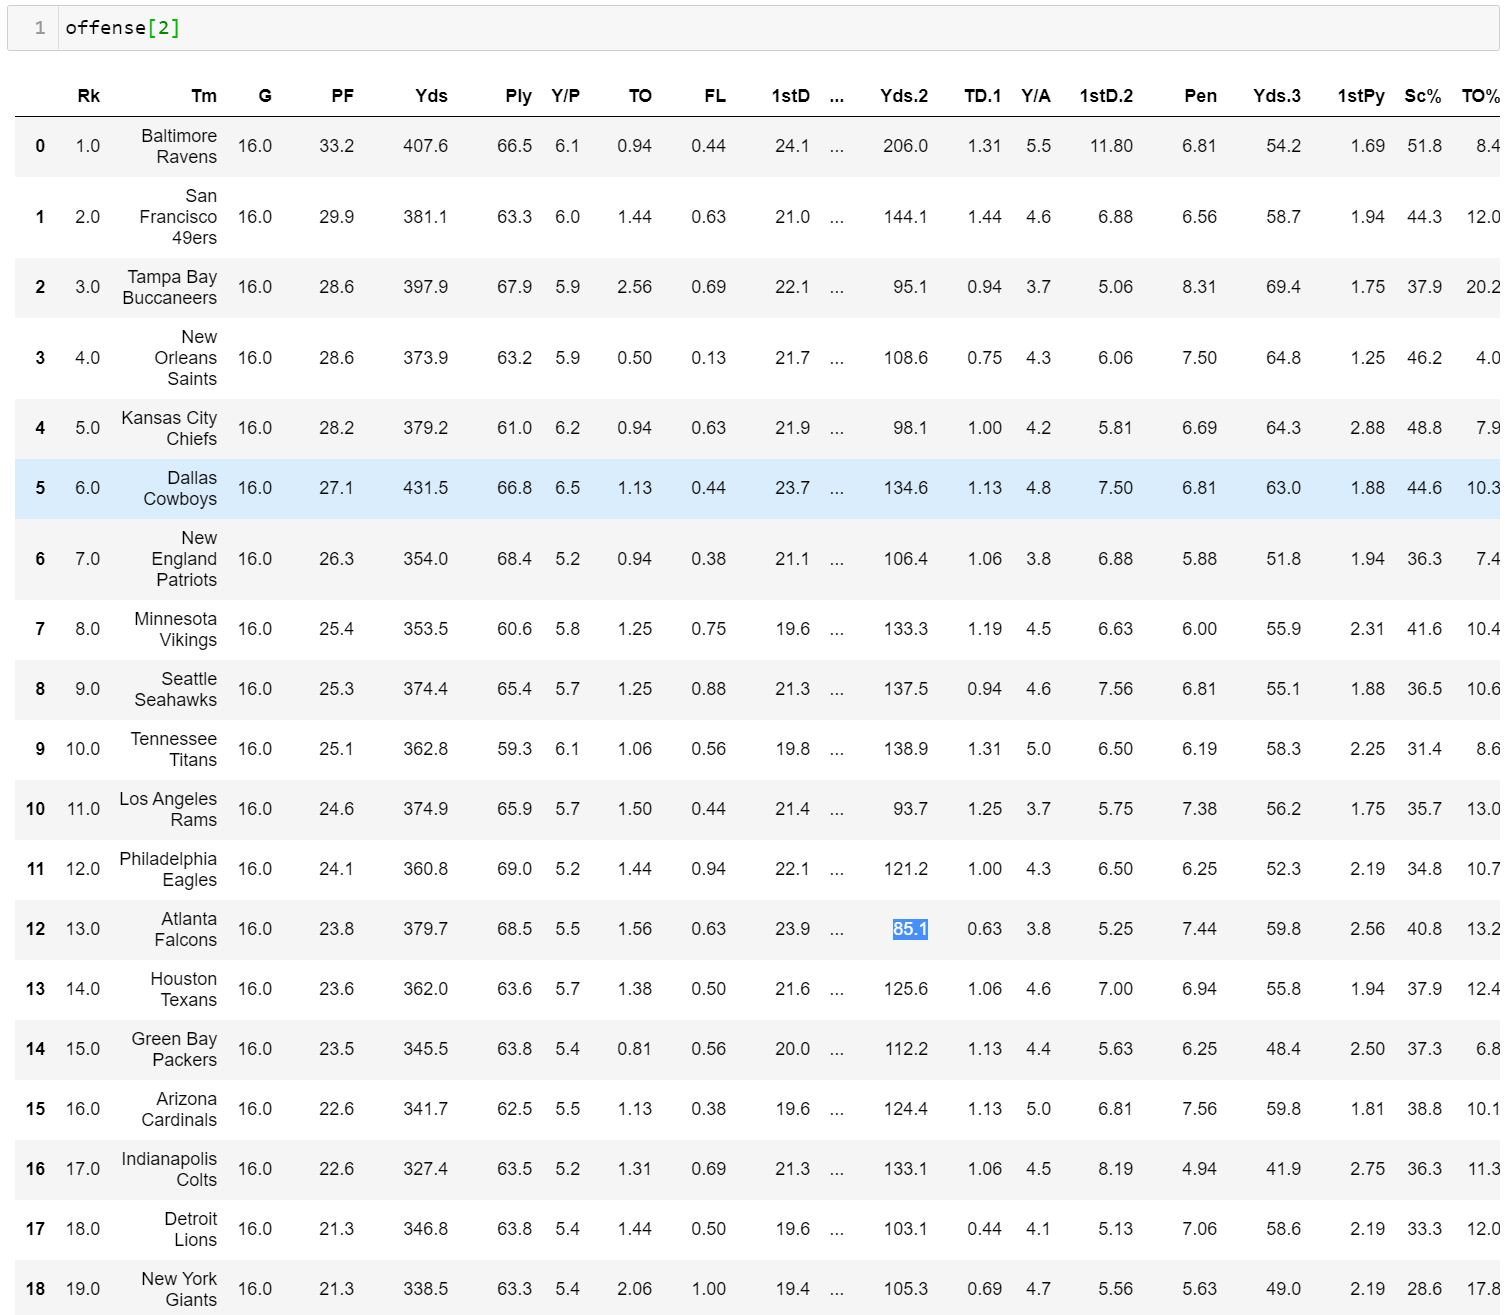
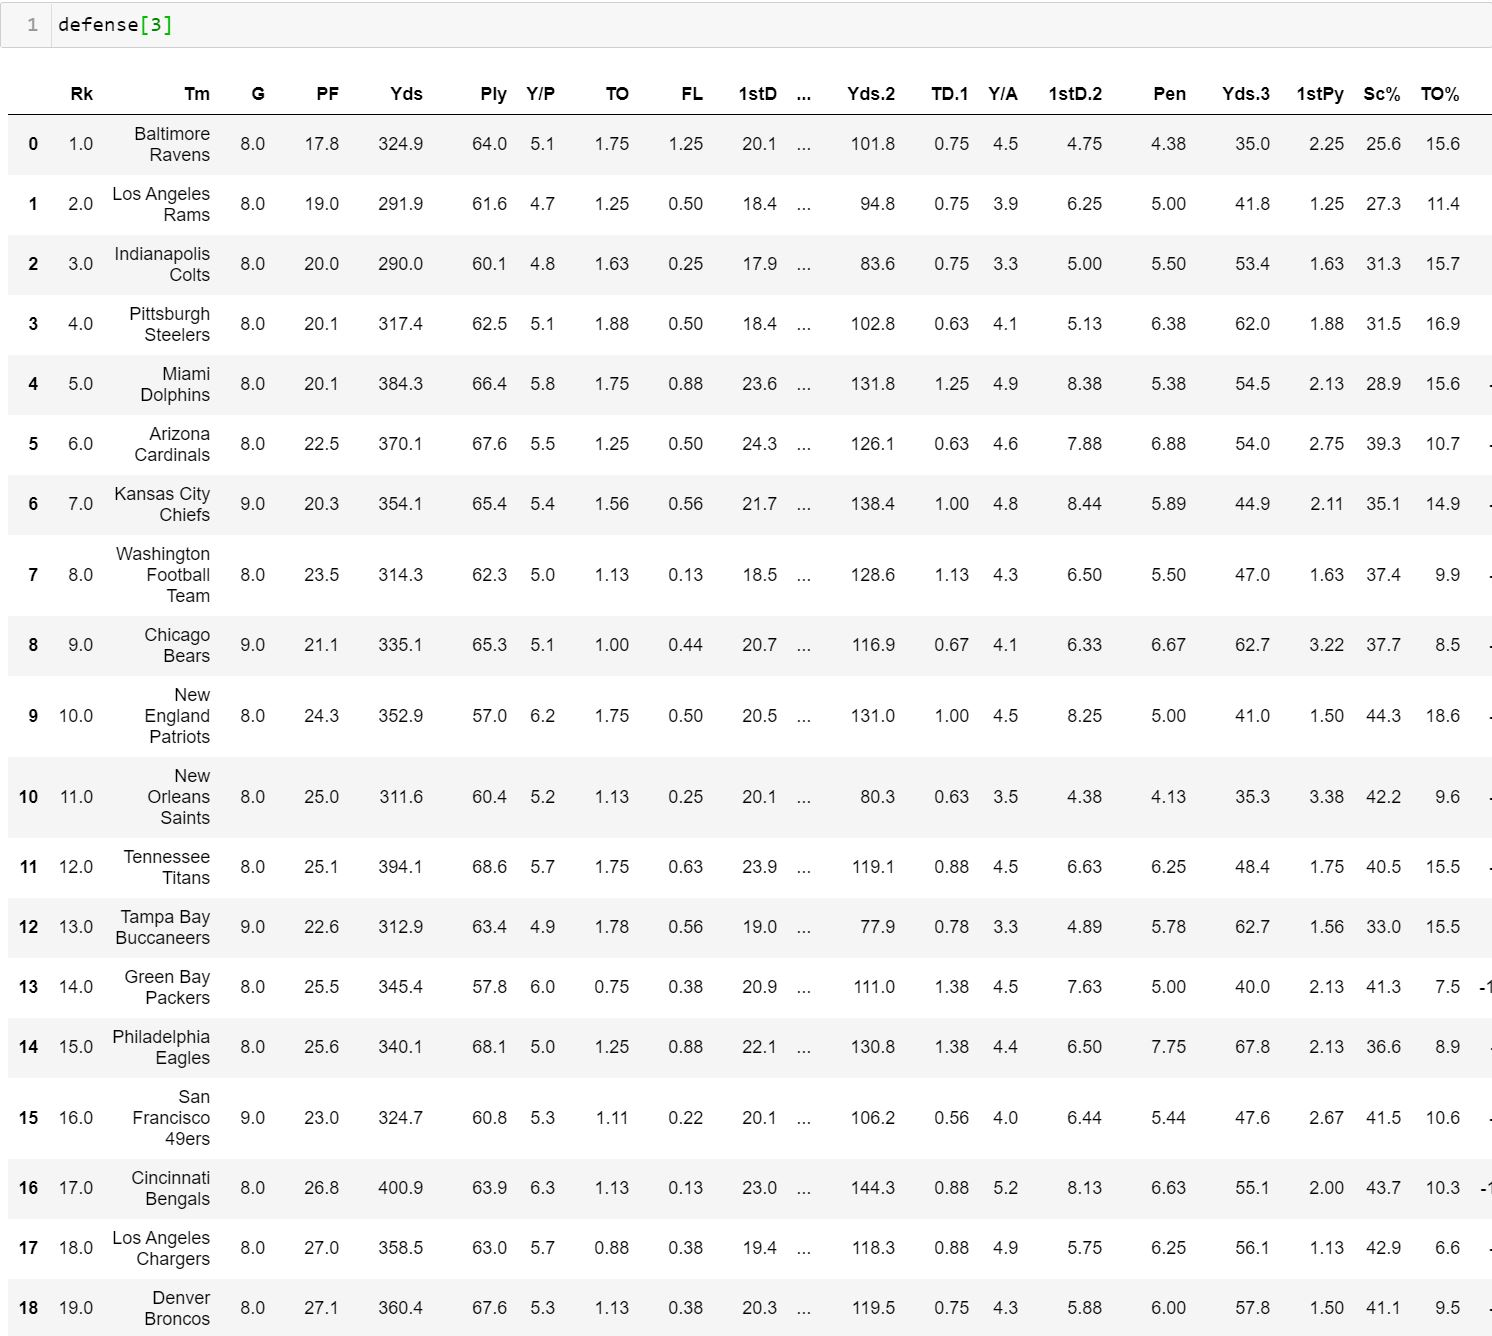

Finally, the data containing the winning percentages looks like this:

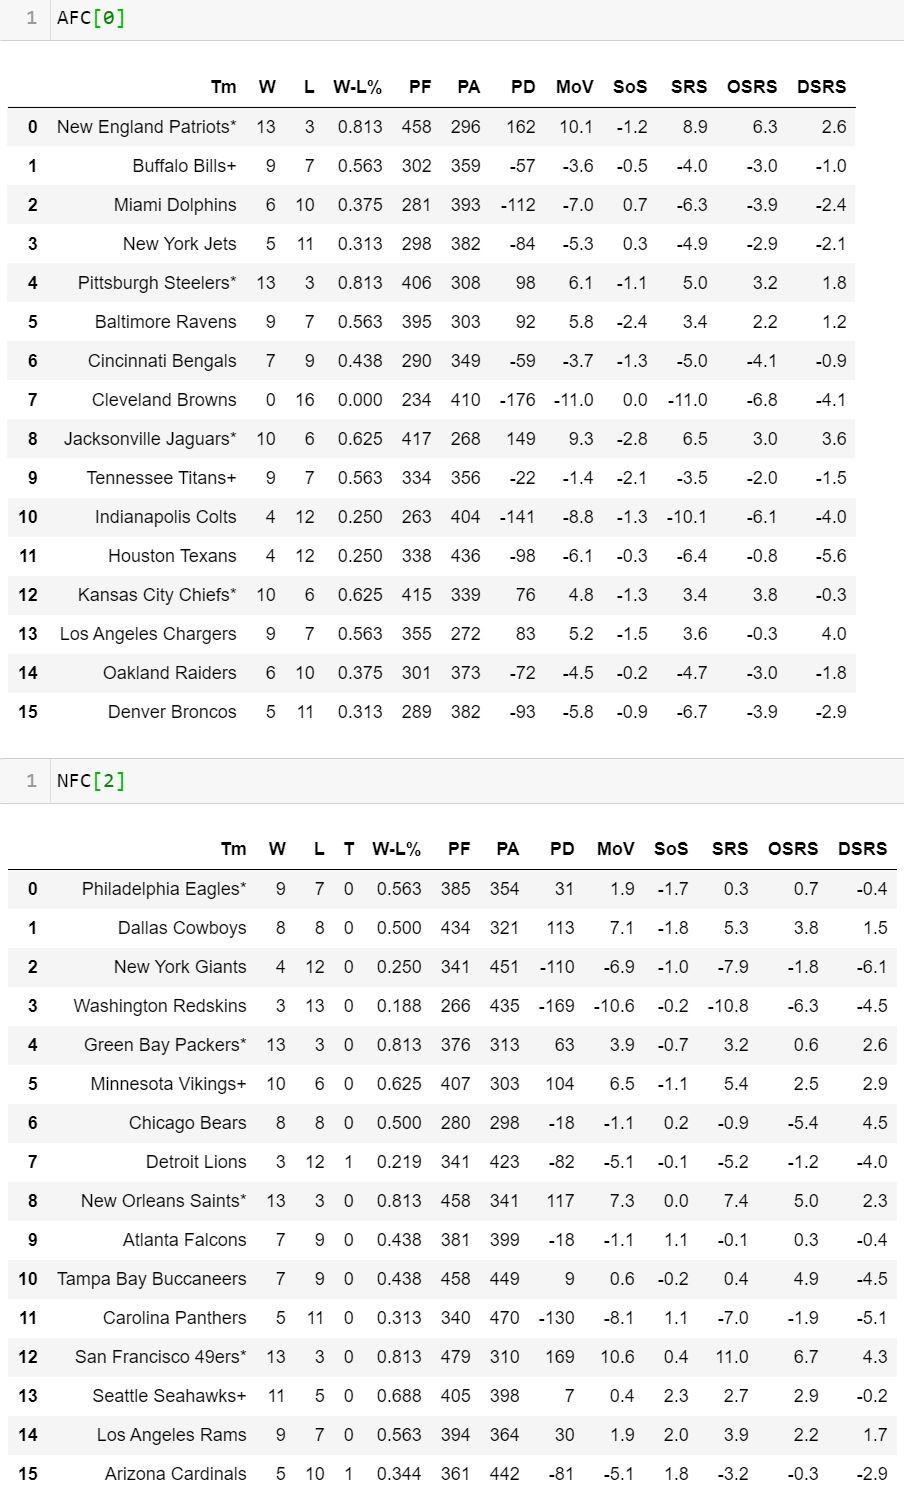

Next, I use a utils function to clean each of the datasets to fit my purposes. The salary data looks like this:

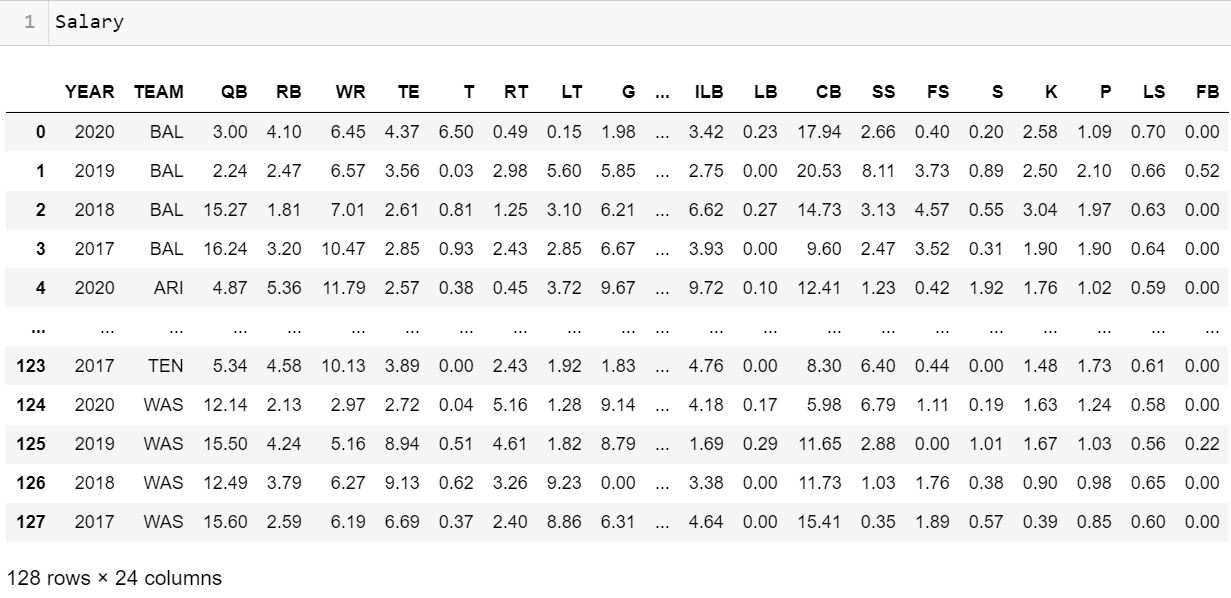

While the statistical data looks like this:

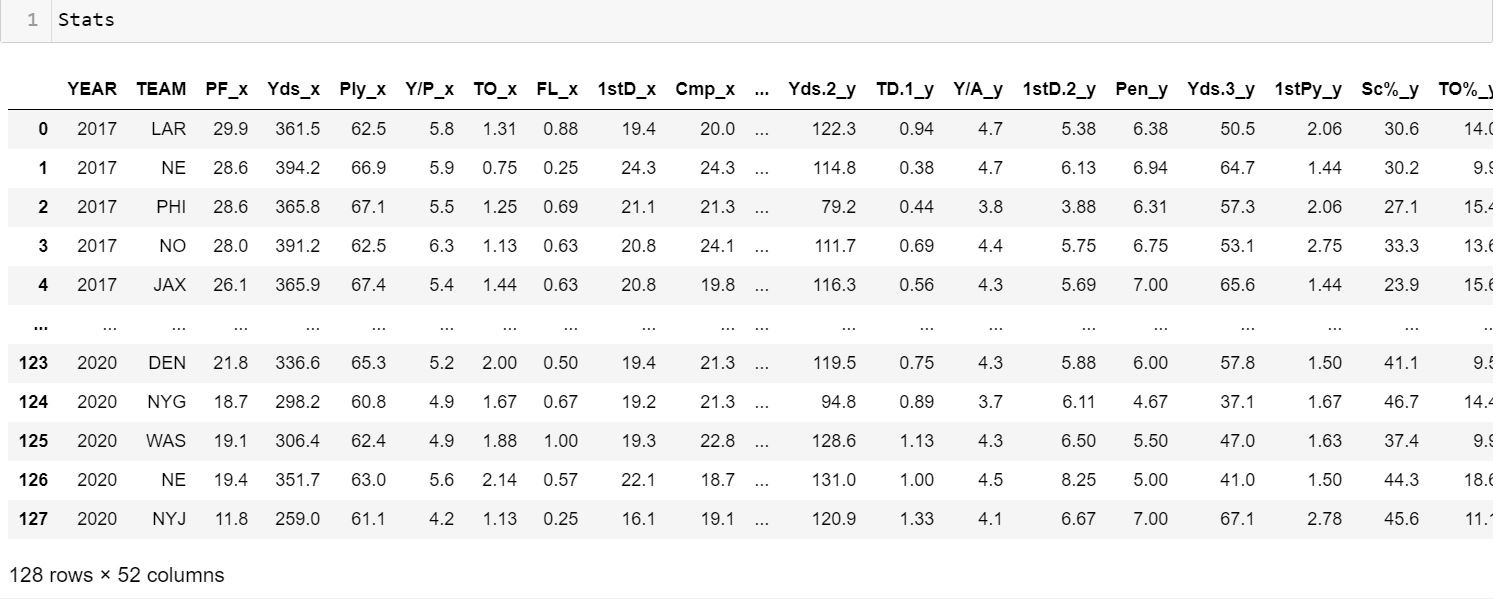

And, finally, the data containing the winning percentages looks like this:

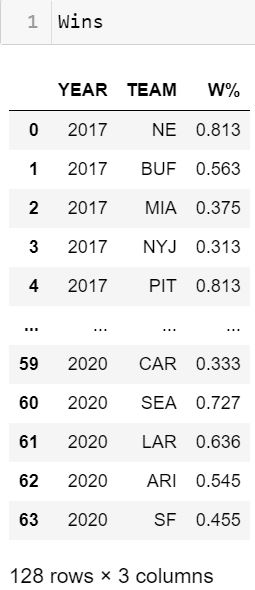

Since I am only focused on the salary data for clustering, I proceed with this data and leave the rest for later.



I remove the year and team columns, as they are not needed for clustering. When scaling the data, both scoring metrics do worse, and since the data is all in the same unit (percentage of the yearly cap on each position) I decide scaling the data is not necessary for this particular clustering. I check the scores to find the right number of clusters:

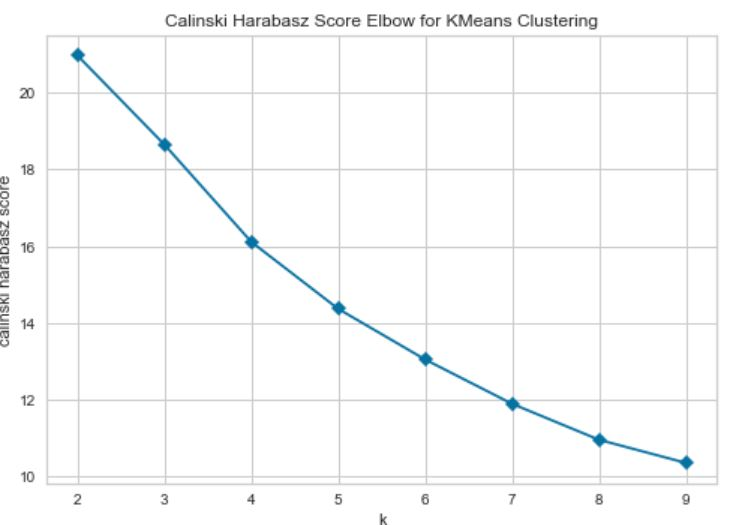
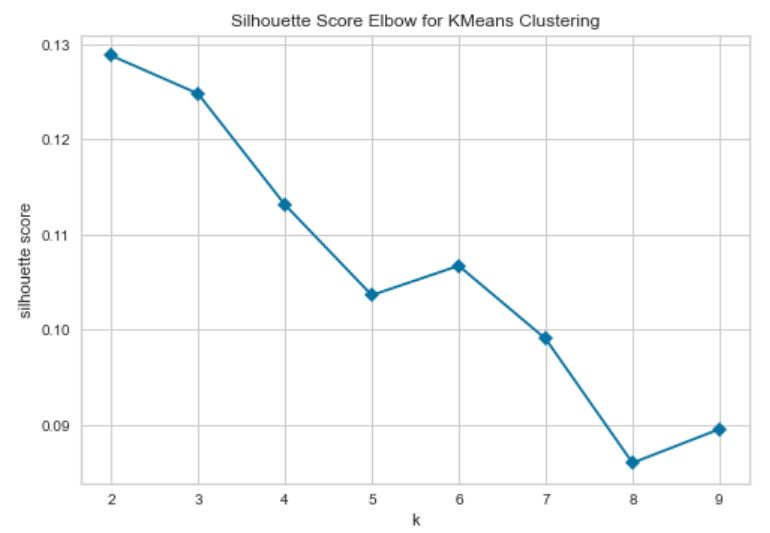

I next decide to use Principal Component Analysis on the data to see if the data is reducible:

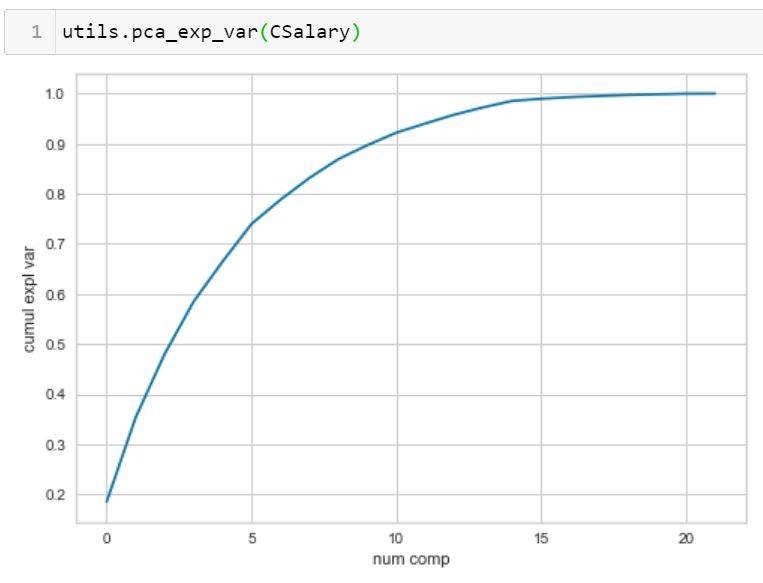

It does seem like the data can be reduced, so I apply PCA on a 99% threshold:

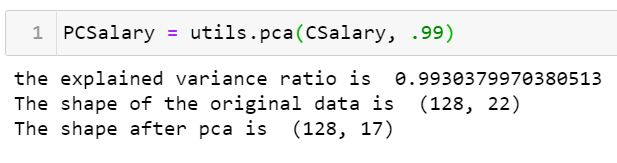

Now, I again try to find the optimal number of clusters:

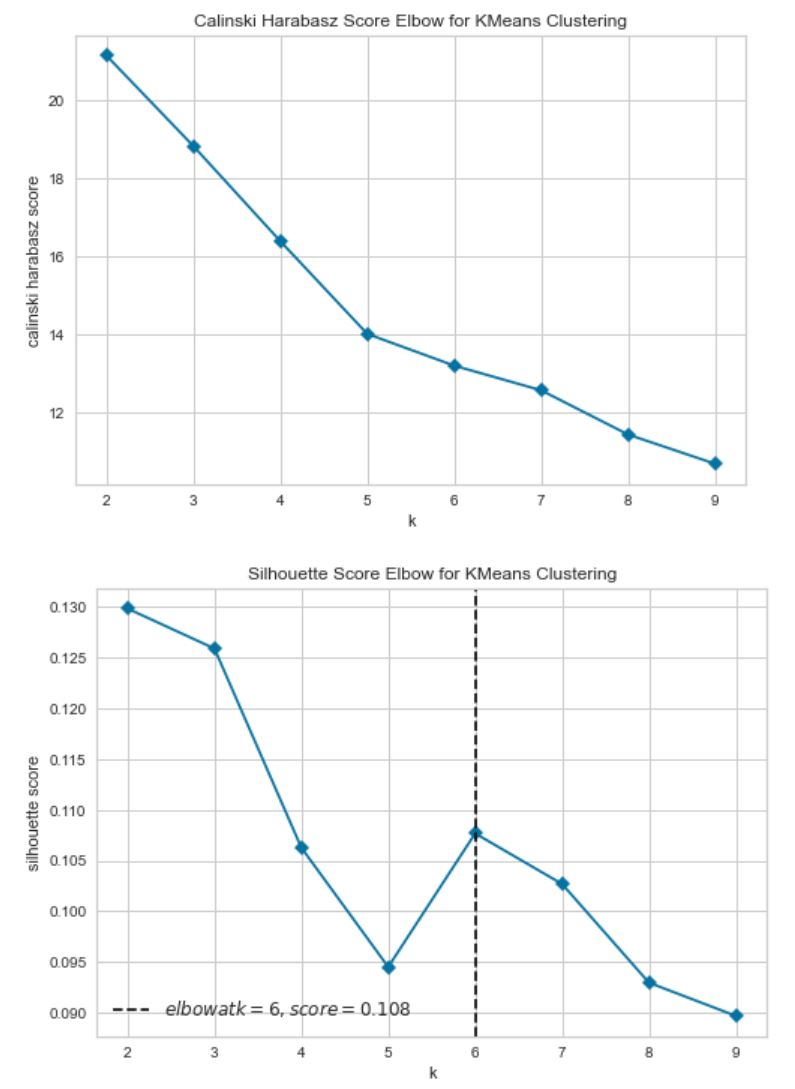

While the calinski_harabasz score is less clear, it does seem like 6 clusters is a good choice based on this data. It is true that due to the limited size of the dataset, clustering to this degree could become problematic, but in order to find interesting results in positional spending, a larger number of clusters is needed, so I decide to try out 6 and see what happens.



I cluster the data, and then add the clusters back to the original salary data, in order to produce meaningful visualizations:

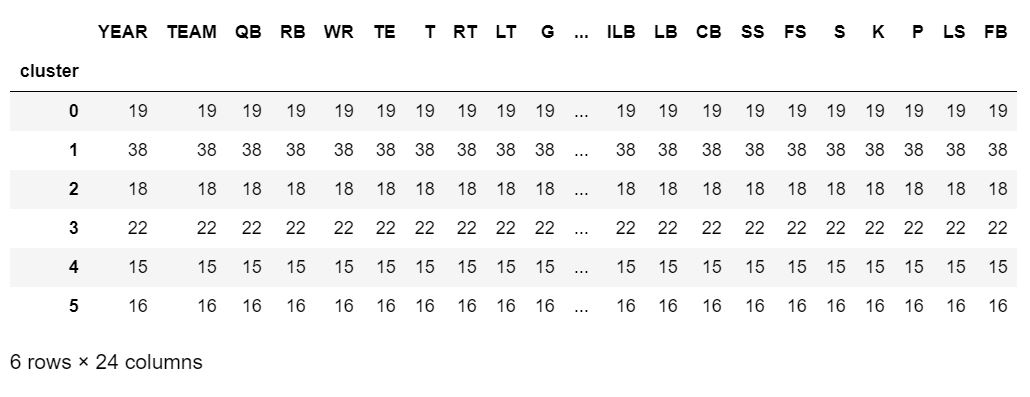

One of the clusters is significantly bigger than the others, which is worth taking note of, but with the clustering finished, it is time to explore the data.

# Results and Discussion

Before looking at the data, it can be helpful to see how the first few components of PCA do at showing meaningful differences in the data. First I plot components 1 and 2 of the data:

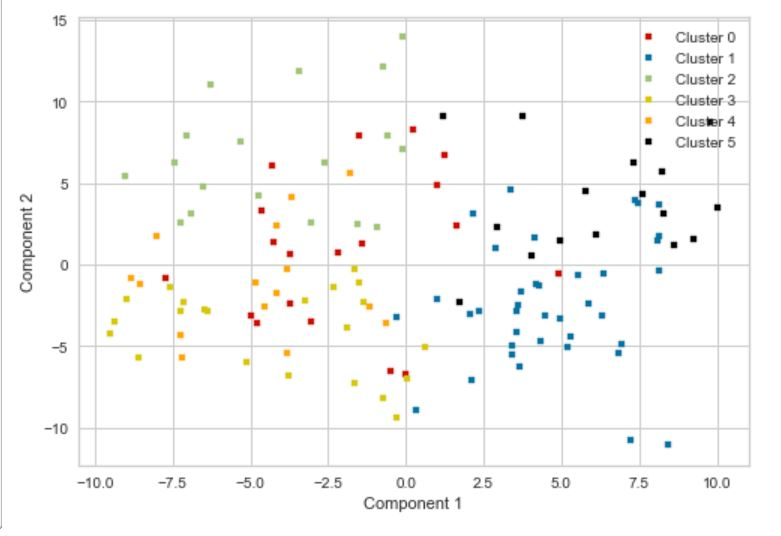

There are some meaningful differences here, as cluster 1 seems to be mostly on the bottom right quadrant, and cluster 2 on the top left quadrant, for example. There is a lot of overlap, however, so I doubt there will be anything meaningful between components 2 and 3:

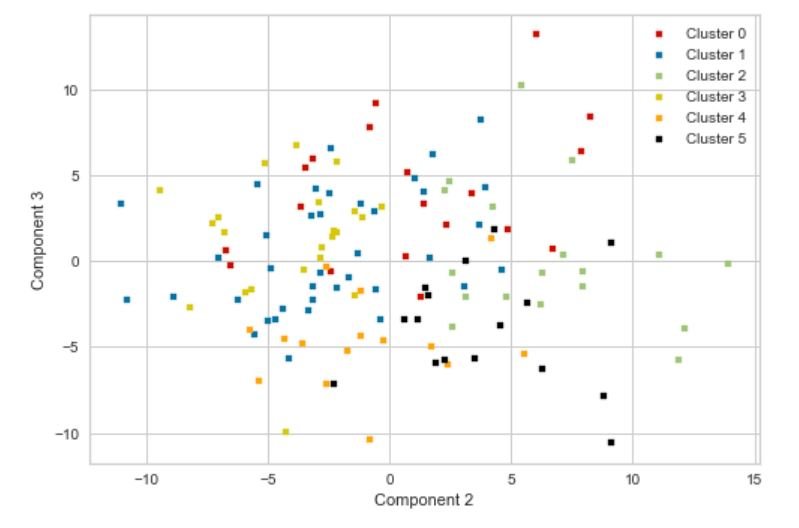

It does seem like there is much less meaning here, so I stop there. Next step is to examine the clustered data itself. The first thing I do is check the means of the clusters:

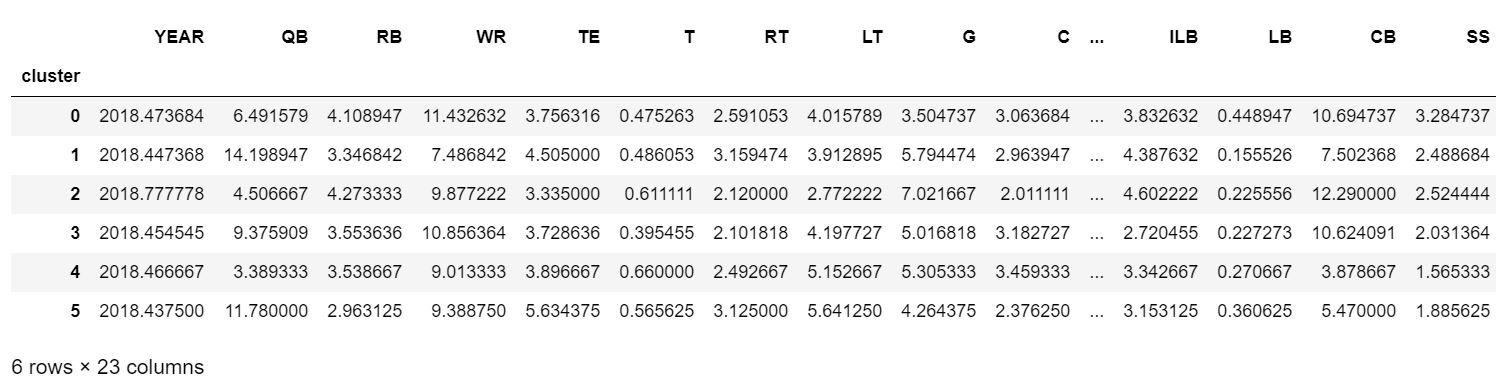

There seems to be some meaning here. For example, when looking at QB, clusters 1 and 5 spend the most, while clusters 2 and 4 spend the least. By a fairly significant amount, also. 



I then group positions by role (offense, defense, special teams) and plot the spending between offense and defense:

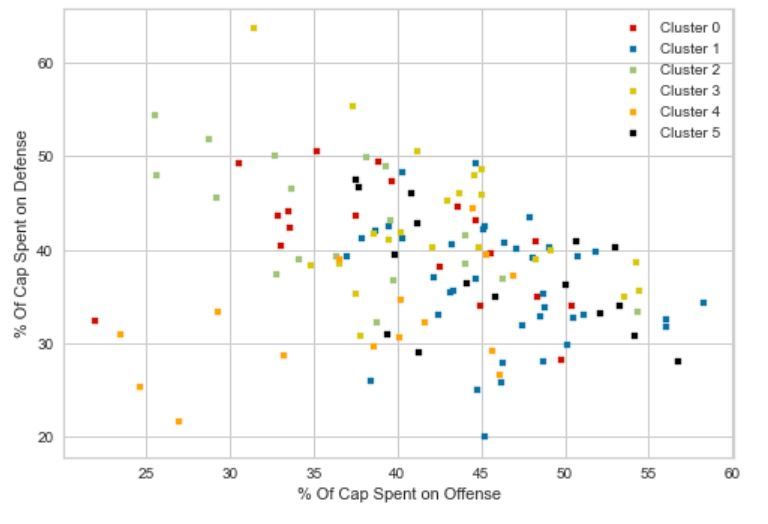

Not surprisingly, it appears the more spent on one, the less is spent on the other. Cluster 1 seems to spend more on offense than defense, and cluster 2 seems to spend more on defense than offense, if only slightly. Cluster 4 seems to spend little on both, and the other clusters are sort of in the middle.



Now I add in the data containing win percentages and stats in order to see how positional spending allocation affects those. First I check how money spent on offense and defense relates to yards gained or allowed, respectively:

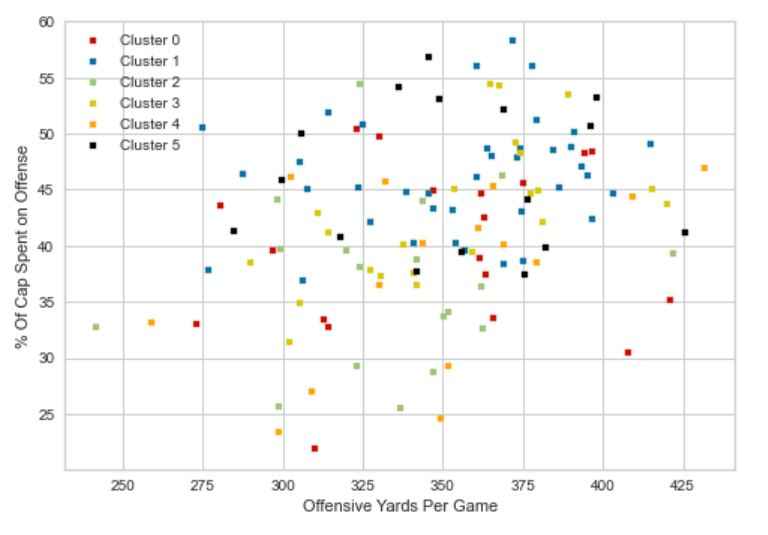
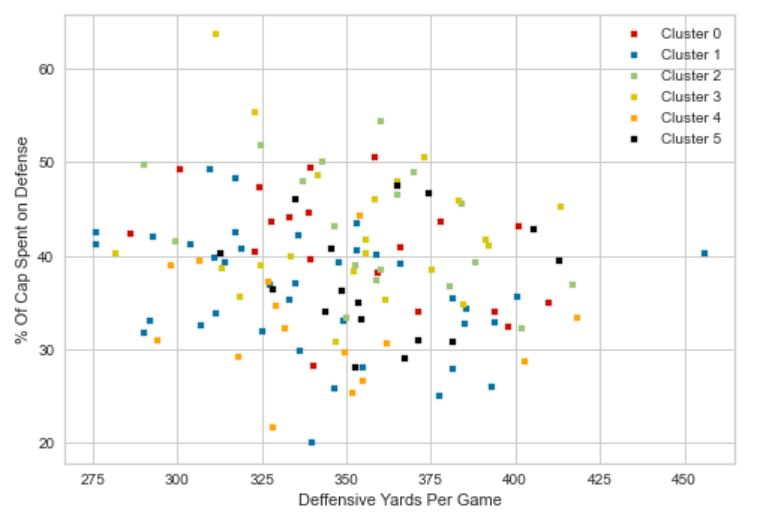

There seems to be a clear trend for offense, more money relates to more yards gained, although obviously it is far from guaranteed. For the defense, the trend is less clear, which implies spending more money on defense might not relate to less yards allowed. Perhaps the gain is elsewhere.



I move to relevant positional spending, checking the amount spend on a quarterback and the passing yards per game:

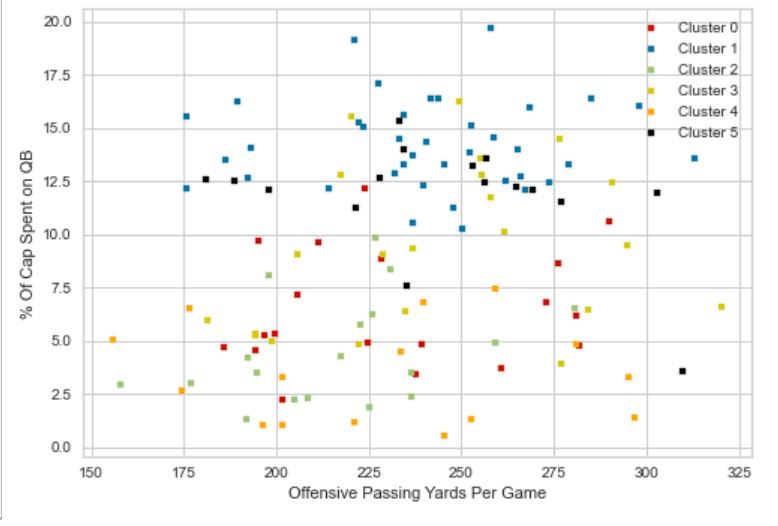

There does seem to be a slight positive trend, but the data is all over the place, implying spending more on a quarterback does not necessarily lead to more passing yards. I decide to try the same thing with wide receivers, the main target of passes:

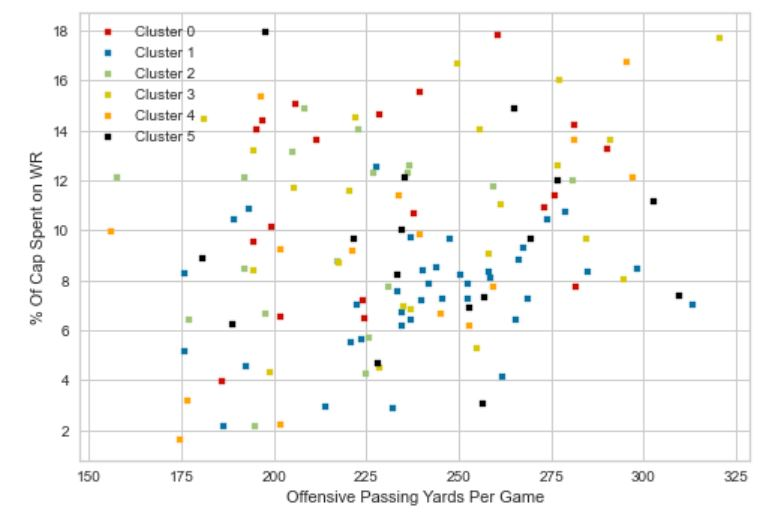

The trend here seems stronger, although the data is still a bit all over the place. Cluster 1, which spends ta lot on quarterbacks, spends relatively little on receivers, which makes sense. While teams that spend more on receivers have a chance to get more yards per game, they also have a chance to do worse as well. A lot of the cluster 1 teams are near the average amount gained, so it seems like this strategy of spending more on a quarterback and less on a receiver is more consistent, which means it is safer.



I also check the amount spent on running backs and rushing yards gained per game:

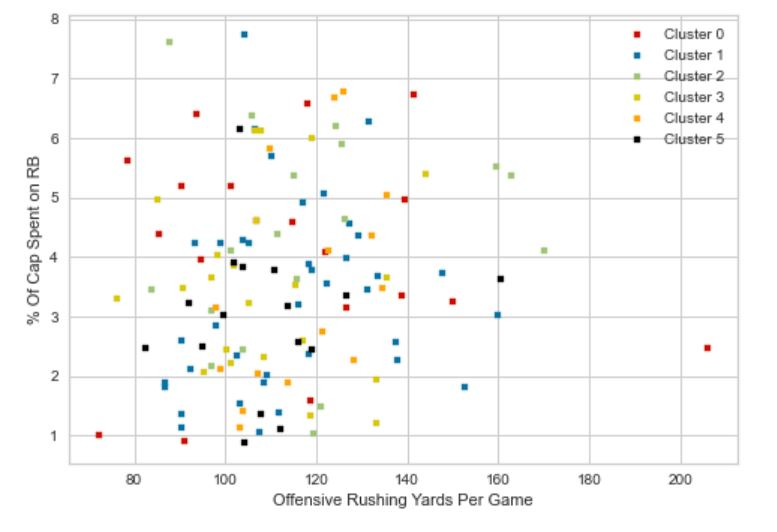

There is a slight trend, although it does not seem like the amount spent on running backs changes the rushing yards per game all that much. Cluster 1 teams not surprisingly seem to not spend as much on running backs, but it does not seem to hurt their production all that badly, again suggesting that this is the “safe” strategy. Cluster 1 is also the biggest cluster, which suggests that teams are more likely to “play it safe” by taking this spending strategy. 



I check some defensive metrics this way as well, but those are not super helpful. It makes sense, because defense has to work together even more so than the offense to get stops, so breaking down the contribution of any one position is harder to accomplish. The more spent on corner backs, who cover receivers, the less yards the defense allows, but not by a meaningful amount. Other positions play a massive role, such as the pass rush that hurries the quarterback into making a bad throw. 

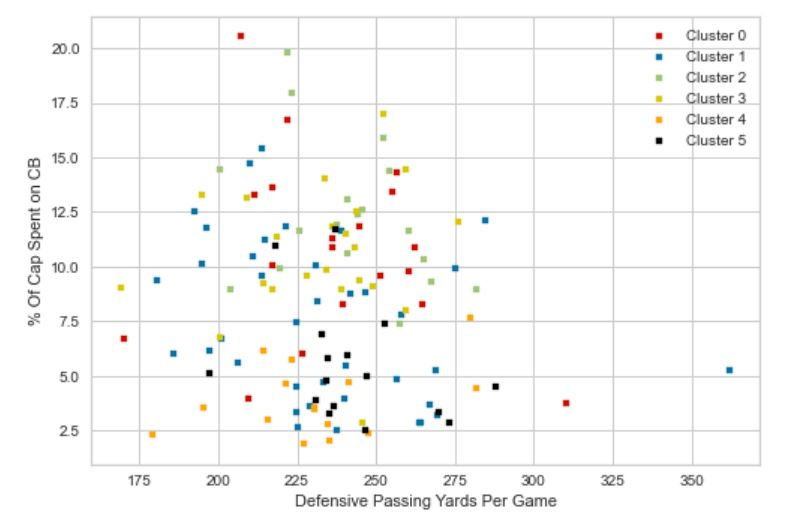

Finally, I decide to plot win percentage against 3 important groupings, percent of cap spent on offense, percent of cap spent on defense, and percent of cap spent on quarterback. The saying used to be “defense wins championships,” although in the modern league, offense seems to have taken over in terms of importance. Seeing which if either contributes more could be telling. As for the quarterback, as the most expensive position on average, it is telling to see if that spending produces wins:

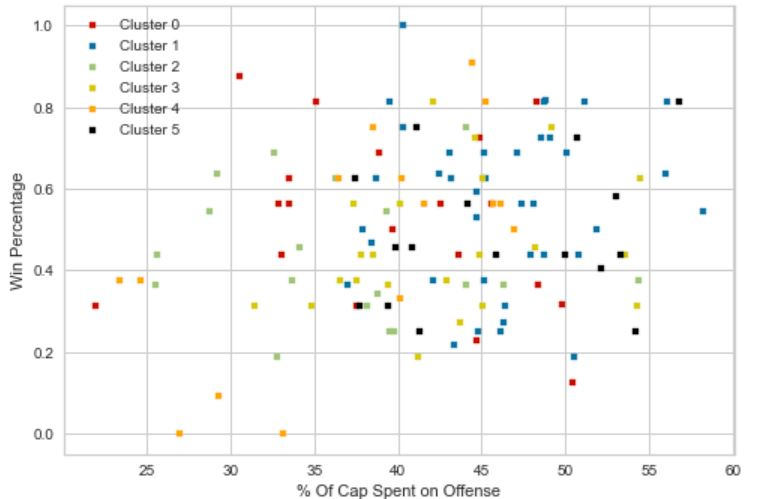
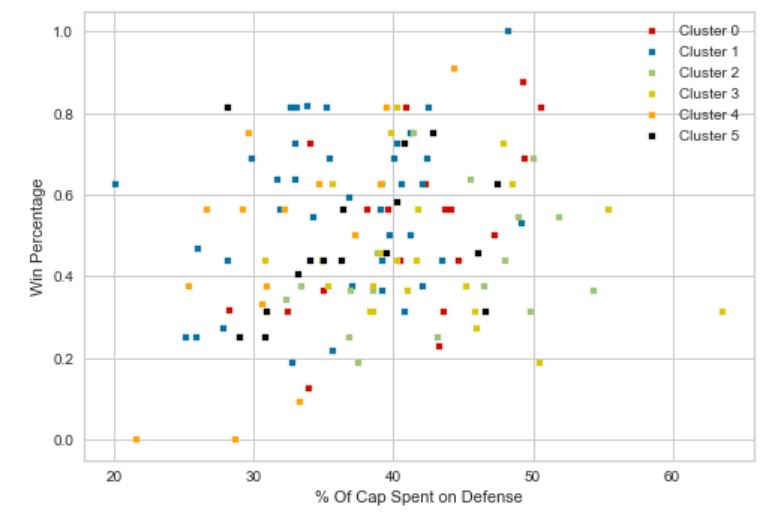
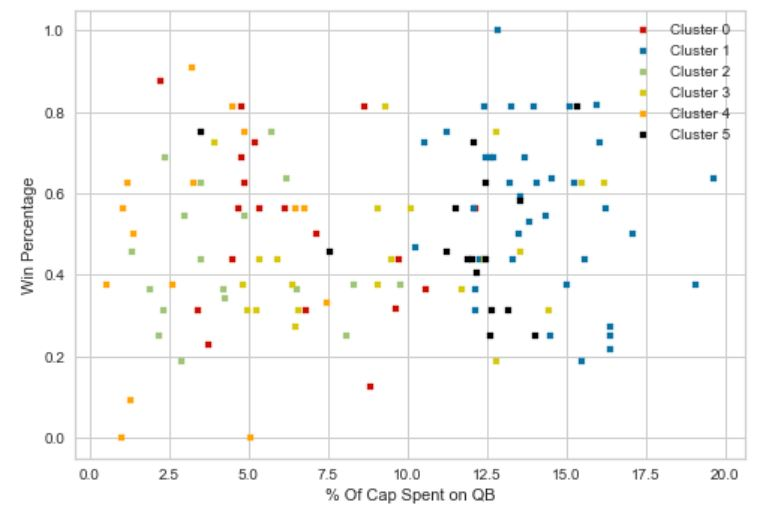

While there seems to be a positive trend in both cases, it is more pronounced on defense. This implies that spending on defense more clearly leads to wins than spending on offense. However, the bulk of the teams in all clusters seem to spend more on offense than defense, so while there is a strong implication that spending more on defense leads to results than spending on offense, it seems like offense might still play a bigger role overall, since more money is being spent there. 



As for the quarterback, there seems to be little relationship between amount spent and wins. It seems like teams that spend more lose less on the bottom range, and are more consistent, which goes along with the safe approach. However, it seems like paying a quarterback any amount of money can lead to virtually any amount of wins, implying that while a quarterback is important, one player cannot make a team, so consideration needs to be given to other positions. If the quarterback takes more money, other positions make less. Spending allocations thus seem to work in many ways, as long as it is done with a purpose to fit a team identity.

# Conclusion and Summary

In conclusion, this project produced some interesting results. It showed the largest cluster which also seems to be the safest cluster, which might explain why more teams choose to spend in this way than any other. There does seem to be a relationship between spending allocation and both stats and win percentages, although the relationship is extremely complex, and would take a much more complex project to understand further. As an initial exploration, it does a good job exploring these relationships, but much more work needs to be done to find meaningful answers to more idealized spending allocations.

# Limitations and Later Work

One of the biggest limitations of this project is clearly the size of the dataset. Only having 128 observations makes it very hard to really generalize the information, and further breaking the data into 6 clusters makes some of the clusters rather small. Obviously, gaining access to more data would help, but that would only come with 32 observations a year unless access was granted to the older sets. As for clustering size, it might help in the future to try with 3 clusters and see how much that changes things. While it’s possible that less clusters would be a disservice, it is also possible that doing so would at least partially make up for the lack of data, and some of these 6 clusters might turn out to really be outliers if the set were larger. 

So, in summary, the amount of data available is a massive issue, and solving that issue would be the bulk of further work. Once that is solved, perhaps a more in-depth pass can be done, perhaps using regression to try to predict win totals based on positional spending allocations to then find ideal allocation combinations.


# References and Contributions

Example of offensive team data: https://www.pro-football-reference.com/years/2020/index.htm

Example of defensive team data: https://www.pro-football-reference.com/years/2002/opp.htm

Years from 2017-2020 are used for this project. The "Total Offense" and "Total Defense" tables for each season are what I use. Toggle per game stats.

Example of data containing win percentages: https://www.pro-football-reference.com/years/2017/index.htm

Same as the offensive team data page. The AFC and NFC standings tables. Years from 2017-2020 are used for this project.

Example of positional spending data: https://www.spotrac.com/nfl/washington-football-team/positional/2017/full-cap/

Each player is taken from each team from 2017-2020.